In [12]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

import sys
sys.path.insert(1, '/Users/u0979082/Documents/COVID19Research/ModelValidation')
import datamanager as DM
import model as Model
import templatetable as TTable

def log_parabola(x,xo,alpha,beta):
    return (x/xo)**(-alpha-beta*np.log(x/xo))

def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def last_n_avg(a,n):
    ret_a = np.cumsum(a, dtype=float)
    ret_b = ret_a[:-n]
    ret_b = np.insert(ret_b, 0, 0., axis=0)
    return (ret_a[n-1:]-ret_b)/n

#Exponential Moving Average (EMA) 
def EMA(a,n,alpha):
    EMA_a = list(a[:n-1])
    for index, item in enumerate(a[n-1:]):
        k = float(alpha)/(n+1.0)
        EMA_a.append(item*k + EMA_a[-1]*(1-k))
    return EMA_a

def derivatives(x):
    differential_back = []
    differential_around = []
    for i in range(1,len(x)):
        differential_back.append(x[i]-x[i-1])
    for i in range(1,len(x)-1):
        diff_1 = x[i]-x[i-1]
        diff_2 = x[i+1]-x[i]
        differential_around.append((diff_1+diff_2)/2.0)
    return differential_back,differential_around

In [13]:
Country_Data = DM.Data_Manager('/Users/u0979082/Documents/COVID19Research/Evan_Dataset_Code_scrubbed/COVID19_country_04-24-2020.csv')
Country_Data.Set_Min_Confirmed(1)
country_list = Country_Data.Get_Available_Countries()
df = pd.DataFrame(columns = ['Country_Region','time','count'])

In [14]:
for country in country_list:
    Country_Data.Set_Country(country)
    state_list = Country_Data.Get_Province_State()
    for state in state_list:
        Country_Data.Set_Province_State(state)
        Total_Conf_Time, Total_Conf_Count = Country_Data.Get_Total_Confirm()
        if len(Total_Conf_Count) > 10:        
            Dt = (Total_Conf_Time - Total_Conf_Time[0])/(60.0*60.0*24.0)/1000000000
            df = df.append({'Country_Region' : country+'_'+state , 'time' : Dt,'count': Total_Conf_Count} , ignore_index=True)

In [15]:
df.Country_Region.unique()

array(['Austria_NA', 'Belgium_NA', 'France_NA', 'France_French Guiana',
       'France_French Polynesia', 'France_Guadeloupe',
       'France_Martinique', 'France_Mayotte', 'France_New Caledonia',
       'France_Reunion', 'France_Saint Barthelemy',
       'France_Saint Pierre and Miquelon', 'France_St Martin',
       'Germany_NA', 'Greece_NA', 'Israel_NA', 'Italy_NA',
       'Netherlands_NA', 'Netherlands_Aruba',
       'Netherlands_Bonaire, Sint Eustatius and Saba',
       'Netherlands_Curacao', 'Netherlands_Sint Maarten', 'Norway_NA',
       'South Korea_NA', 'Spain_NA', 'Sweden_NA', 'Switzerland_NA',
       'United Kingdom_NA', 'United Kingdom_Anguilla',
       'United Kingdom_Bermuda', 'United Kingdom_British Virgin Islands',
       'United Kingdom_Cayman Islands', 'United Kingdom_Channel Islands',
       'United Kingdom_Falkland Islands (Malvinas)',
       'United Kingdom_Gibraltar', 'United Kingdom_Isle of Man',
       'United Kingdom_Montserrat',
       'United Kingdom_Turks and

In [16]:
country = 'Germany_NA'
df_selected_ciuntry = df.loc[(df['Country_Region'] ==country )]
counts = df_selected_ciuntry['count'][df_selected_ciuntry.index[0]]
time = df_selected_ciuntry['time'][df_selected_ciuntry.index[0]]
new_pat = derivatives(counts)[0]

Text(0, 0.5, 'New Patients Count')

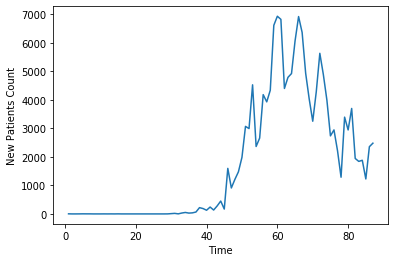

In [19]:
plt.plot(time[1:],new_pat)
plt.xlabel('Time')
plt.ylabel('New Patients Count')

In [20]:
smoothed_new_pat =  EMA(new_pat, 7, 3) 
new_pat_time = time[4:-3].astype(int)
norm_residuals = (np.array(new_pat) - np.array(smoothed_new_pat))/np.array(smoothed_new_pat)


norm_residuals[np.isnan(norm_residuals)] = 0

norm_residuals_ext = norm_residuals[30:]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
tot_first_curve = np.sum(smoothed_new_pat)


shift = smoothed_new_pat[-1] - smoothed_new_pat[30]

tot_extended_curve = np.sum(smoothed_new_pat[30:]+shift)

curve_norm = tot_first_curve/tot_extended_curve

scalling_of_the_second_curve = 0.5



extention = scalling_of_the_second_curve*curve_norm*(np.array(smoothed_new_pat[30:]))+shift


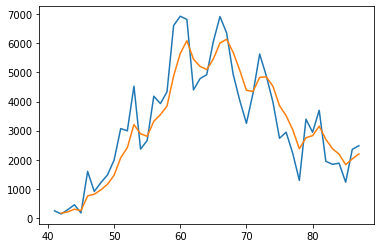

In [36]:
plt.plot(time[41:],new_pat[40:])
plt.plot(time[42:], smoothed_new_pat[41:])

In [44]:
time_temp = np.arange(int(new_pat_time[-1])+1,int(new_pat_time[-1])+1+len(new_pat_time[30:]),1)
extended_time = np.concatenate((new_pat_time.astype(int), time_temp), axis=0)
extended_curve =  np.concatenate((smoothed_new_pat,extention ), axis=0)

print(time_temp)
print(extended_time)
print(len(extended_curve))
print(len(extended_time))
#plt.plot(extended_time,extended_curve)

[ 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135]
[  4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135]
144
132


In [ ]:
first_deriv = derivatives(extended_curve)[0]
time_for_first_deriv = extended_time[1:]
plt.plot(time_for_first_deriv[3:-3],EMA(first_deriv,7))

In [ ]:
SMA_First_Deriv = moving_average(first_deriv,7)
SMA_First_Deriv_Time = time_for_first_deriv[3:-3]

EMA_Fitst_Deriv = EMA(first_deriv,7,3)
EMA_First_Deriv_Time = time_for_first_deriv


second_deriv = derivatives(SMA_First_Deriv)[0]
time_for_second_deriv = SMA_First_Deriv_Time[1:]

SMA_Second_Deriv = moving_average(second_deriv,7)
SMA_Second_Deriv_Time = time_for_second_deriv[3:-3]

plt.plot(SMA_First_Deriv_Time,SMA_First_Deriv,'g-')
plt.plot(EMA_First_Deriv_Time, EMA_Fitst_Deriv,'r-')


In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('New Patients', color=color)
ax1.plot(extended_time,extended_curve, color=color,label='New Patients')
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('First Deriv', color=color)  # we already handled the x-label with ax1
ax2.plot(time_for_first_deriv[3:-3],SMA_First_Deriv, color=color,label='First Derivative')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
ax3.set_ylabel('Second Deriv', color='green')  # we already handled the x-label with ax1
ax3.plot(SMA_Second_Deriv_Time,SMA_Second_Deriv,color='green',label='Second Derivative')
#ax3.tick_params(axis='y', labelcolor='green')

#ax1.legend(loc='lower right')
#ax2.legend(loc=1)
#ax3.legend(loc='upper left')

Auto Correlation

In [11]:
stats.pearsonr(extended_curve[4:-3],SMA_First_Deriv)[0]
Extended_Overlay_First_Der = extended_curve[4:-3]

NameError: name 'extended_curve' is not defined

In [ ]:
cross_corr = []
for i in range(1,100):
    cross_corr.append(stats.pearsonr(Extended_Overlay_First_Der[i:],SMA_First_Deriv[:-i])[0])
    
peaks, properties = find_peaks(cross_corr, height=0)
plt.plot(peaks, np.array(cross_corr)[peaks], "x")
plt.plot(cross_corr[:20])

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('New Patients', color=color)
ax1.plot(extended_time,extended_curve, color=color,label='New Patients')
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('First Deriv', color=color)  # we already handled the x-label with ax1
ax2.plot(EMA_First_Deriv_Time, EMA_Fitst_Deriv, color=color,label='First Derivative')
ax2.tick_params(axis='y', labelcolor=color)

#ax3 = ax1.twinx()
#ax3.set_ylabel('Second Deriv', color='green')  # we already handled the x-label with ax1
#ax3.plot(SMA_Second_Deriv_Time,SMA_Second_Deriv,color='green',label='Second Derivative')
#ax3.tick_params(axis='y', labelcolor='green')

#ax1.legend(loc='lower right')
#ax2.legend(loc=1)
#ax3.legend(loc='upper left')

NameError: name 'extended_time' is not defined